Name: Soham Bhattacharya <br>
Roll.No.: B2430059

# Lab-04
<h3>Aim: Draw epilines on both images</h3>
Reference: OpenCV Documentation

## Importing necessary libraries

In [26]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

## Reading the image

In [27]:
img1 = cv.imread('img5.jpg', cv.IMREAD_GRAYSCALE)  #queryimage # left image
img2 = cv.imread('img6.jpg', cv.IMREAD_GRAYSCALE) #trainimage # right image

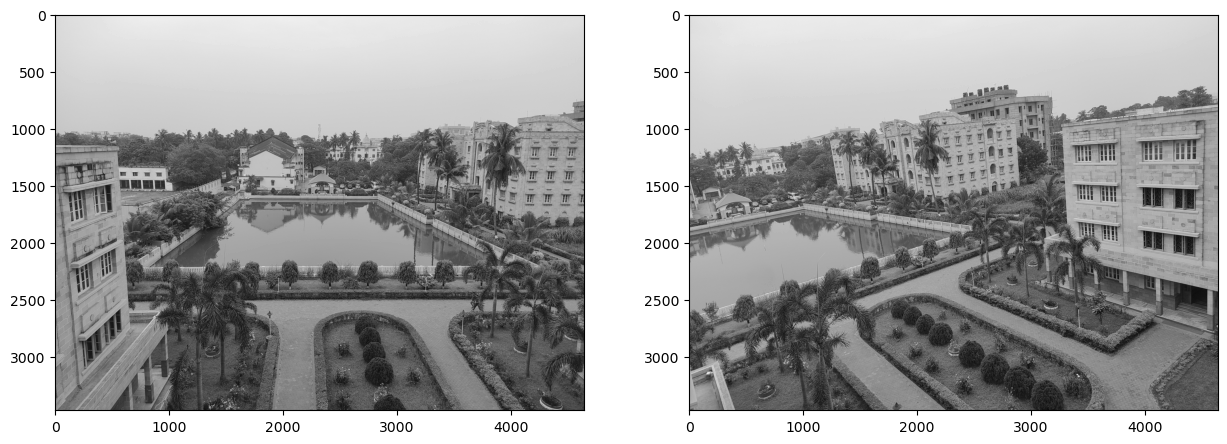

In [34]:
plt.figure(figsize=(15, 8))
plt.subplot(121),plt.imshow(img1, cmap="gray")
plt.subplot(122),plt.imshow(img2, cmap="gray")
plt.show()

## Applying SIFT to detect features

In [35]:
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

## Applying FLANN to match features

In [36]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

pts1 = []
pts2 = []

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

## Fundamental Matrix

In [37]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv.findFundamentalMat(pts1,pts2,cv.FM_LMEDS)

# We select only inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

In [39]:
print(f'The Fundamental Matrix is as follows:\n{F}')

The Fundamental Matrix is as follows:
[[ 4.16374765e-08 -5.92971787e-07  3.59844221e-04]
 [ 1.77421972e-07  1.67759212e-07 -3.37511782e-03]
 [-3.83518832e-04  3.09338222e-03  1.00000000e+00]]


## Finding Epilines

In [40]:
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
    img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2

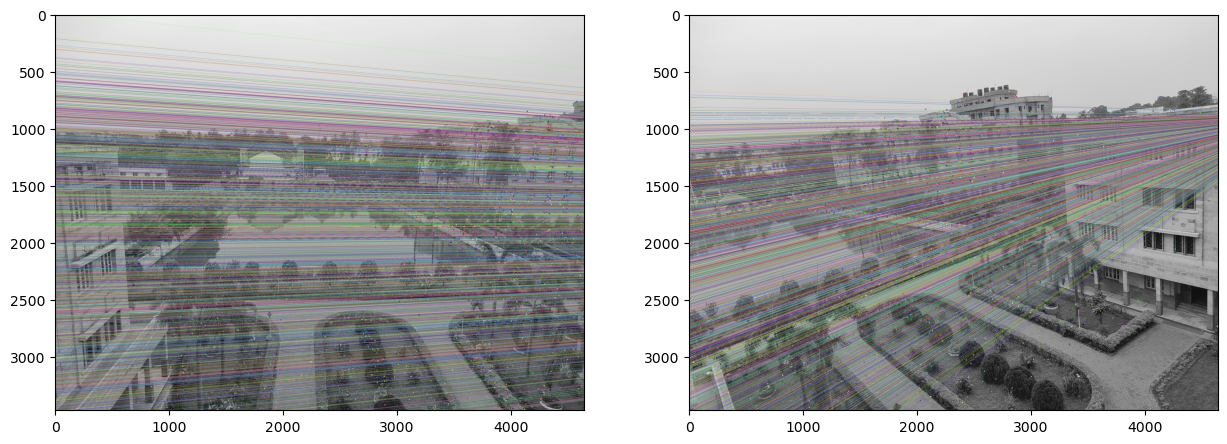

In [41]:
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)

# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

plt.figure(figsize=(15, 8))
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()

# THANK YOU